# Data Cleaning and Investigation

## Imports

### Import Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

### Import Palettes

In [74]:
import sys

sys.path.append(r'C:\Users\svtee\DAI')

from helper.my_funcs import (classic_color, 
                             yacht_club_color, 
                             bold_basics_color,
                             basic_brights_color,
                             beeswax_clay_color,
                             main_color
                             )

### Load / Read and Validate Data

In [75]:
yt_df = pd.read_csv('../../.gitignore/data/USvideos.csv')

# View data
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [76]:
# Review null / dtype details
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### DataTime Transformation

In [77]:
# `publish_time`
yt_df['publish_time'] = pd.to_datetime(yt_df['publish_time'], errors='coerce')

yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [78]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [79]:
# `trending_date`
yt_df['trending_date'] = pd.to_datetime(yt_df['trending_date'], errors='coerce', format='%y.%d.%m')

yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [80]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [81]:
yt_df[yt_df['tags'] == '[none]'].count()

video_id                  1535
trending_date             1535
title                     1535
channel_title             1535
category_id               1535
publish_time              1535
tags                      1535
views                     1535
likes                     1535
dislikes                  1535
comment_count             1535
thumbnail_link            1535
comments_disabled         1535
ratings_disabled          1535
video_error_or_removed    1535
description               1260
dtype: int64

### Create `category_id_name` columns from `category_id`

In [82]:
yt_json_df = pd.read_json('../../.gitignore/data/US_category_id.json')

yt_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    32 non-null     object
 1   etag    32 non-null     object
 2   items   32 non-null     object
dtypes: object(3)
memory usage: 900.0+ bytes


In [83]:
# Transfer final copy to `shane's_notebook.ipynb`
yt_json_df = pd.read_json('../../.gitignore/data/US_category_id.json')

cat_id_name_dict = dict(
    zip(
        yt_json_df['items'].str.get('id').astype(int),
        yt_json_df['items'].str.get('snippet').str.get('title')
    )
)

cat_id_name_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [84]:
yt_df.insert(5, 'category_name', yt_df['category_id'].map(cat_id_name_dict))
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Create Columns for Day of Week, Month, and Date
### From `publish_time`

In [85]:
# Create New Columns from `publish_time`
yt_df.insert(
    loc=yt_df.columns.get_loc('publish_time') + 1, 
    column='publish_time_month', 
    value=yt_df['publish_time'].dt.month_name()
    )

yt_df.insert(
    loc=yt_df.columns.get_loc('publish_time') + 2, 
    column='publish_time_day_name', 
    value=yt_df['publish_time'].dt.day_name()
    )

yt_df.insert(
    loc=yt_df.columns.get_loc('publish_time') + 3, 
    column='publish_time_date', 
    value=yt_df['publish_time'].dt.date
    )

yt_df.head(3)

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,publish_time_month,publish_time_day_name,publish_time_date,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01+00:00,November,Monday,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00+00:00,November,Monday,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24+00:00,November,Sunday,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [86]:
# Create New Columns from `trending_date`
yt_df.insert(
    loc=yt_df.columns.get_loc('trending_date') + 1, 
    column='trending_date_month', 
    value=yt_df['trending_date'].dt.month_name()
    )

yt_df.insert(
    loc=yt_df.columns.get_loc('trending_date') + 2, 
    column='trending_date_day_name', 
    value=yt_df['trending_date'].dt.day_name()
    )

yt_df.insert(
    loc=yt_df.columns.get_loc('trending_date') + 3, 
    column='trending_date_date', 
    value=yt_df['trending_date'].dt.date
    )

### Create `tag_df` DataFrame to examine the tags

In [87]:
# Number of Tags
yt_df['tags'] = yt_df['tags'].str.split('|')  # 808_183 different values (not unique)

yt_df.head()

,video_id,trending_date,trending_date_month,trending_date_day_name,trending_date_date,title,channel_title,category_id,category_name,publish_time,...,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,November,Tuesday,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01+00:00,...,[SHANtell martin],748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,November,Tuesday,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00+00:00,...,"[last week tonight trump presidency, ""last wee...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,November,Tuesday,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24+00:00,...,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,November,Tuesday,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04+00:00,...,"[rhett and link, ""gmm"", ""good mythical morning...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,November,Tuesday,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41+00:00,...,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Create a List of Tags by value count
tag_lst = yt_df['tags'].explode().str.strip('"').str.lower().value_counts(ascending=False).drop('[none]')

tag_lst # 56_693 Unique Values

tags
funny         4142
comedy        3647
how to        1702
music         1664
pop           1634
              ... 
wrote            1
casinos          1
frances ha       1
greenberg        1
langford         1
Name: count, Length: 51570, dtype: int64

In [99]:
tags_over_1_000 = tag_lst[tag_lst.values >= 1000]
tags_over_1_000

tags
funny         4142
comedy        3647
how to        1702
music         1664
pop           1634
trailer       1413
food          1280
2018          1275
news          1254
review        1239
makeup        1238
science       1237
humor         1210
celebrity     1130
diy           1110
tutorial      1054
video         1031
television    1024
live          1020
Name: count, dtype: int64

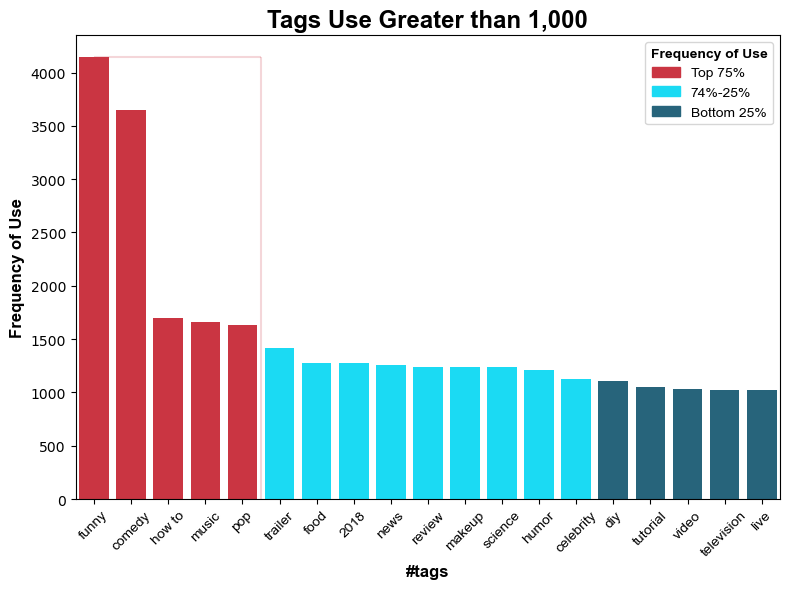

In [145]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(tags_over_1_000.index, tags_over_1_000.values, label=tags_over_1_000.index)
for bar in bars:
    if bar.get_height() >= np.percentile(tags_over_1_000, 75):
        bar.set_facecolor(main_color[0])
    if bar.get_height() < np.percentile(tags_over_1_000, 75) and bar.get_height() > np.percentile(tags_over_1_000, 25):
        bar.set_facecolor(main_color[1])
    if bar.get_height() <= np.percentile(tags_over_1_000, 25):
        bar.set_facecolor(main_color[2])

title_font = {'family': 'arial',
        'style': 'normal',
        'variant': 'normal',
        'stretch': 'normal',
        'weight': 'bold',
        'size': 'xx-large',
        'color': 'black'        
        }
tick_font = {'family': 'arial',
        'style': 'normal',
        'variant': 'normal',
        'stretch': 'normal',
        'weight': 'normal',
        'size': 'medium',
        'color': 'black'        
        }
axis_label_font = {'family': 'arial',
        'style': 'normal',
        'variant': 'normal',
        'stretch': 'normal',
        'weight': 'bold',
        'size': 'large',
        'color': 'black'        
        }

ax.set_title('Tags Use Greater than 1,000', fontdict=title_font)
ax.set_xticks(ticks=tags_over_1_000.index)
ax.set_xticklabels(labels=tags_over_1_000.index, fontdict=tick_font, rotation=45)
ax.set_xmargin(m=0.005)
ax.set_xlabel('#tags', fontdict=axis_label_font)
ax.set_ylabel('Frequency of Use', fontdict=axis_label_font)

ax.vlines(x=4.5,
          ymin=tags_over_1_000.max(),
          ymax=0,
          colors=main_color[0],
          alpha=.2)

ax.hlines(y=tags_over_1_000.max(),
          xmin=0,
          xmax=4.5,
          colors=main_color[0],
          alpha=.2)

handles = [
    mpatches.Patch(color=main_color[0], label='Top 75%'),
    mpatches.Patch(color=main_color[1], label='74%-25%'),
    mpatches.Patch(color=main_color[2], label='Bottom 25%')
]

legend_title_font = {'family': 'arial',
        'style': 'normal',
        'variant': 'normal',
        'stretch': 'normal',
        'weight': 'bold',
        'size': 'medium',
        }

legend_text_font = {'family': 'arial',
        'style': 'normal',
        'variant': 'normal',
        'stretch': 'normal',
        'weight': 'normal',
        'size': 'medium',
        }

ax.legend(handles=handles, 
          title='Frequency of Use',
          title_fontproperties=legend_title_font,
          prop=legend_text_font,
          loc='upper right')
fig.tight_layout();